# Data management in Python

In [1]:
# Import the required libraries

import pandas as pd              # for handling datasets
import numpy as np               # a large collection of high-level mathematical functions
import numpy_financial as npf    # performing financial functions
import matplotlib.pyplot as plt  # for creating plots
import pickle                    # saving and loading Python workfile

### Import the dataset

In [2]:
# Import the dataset and store it into the variable "data"

data = pd.read_excel('D:/OneDrive/Data/Brooks4e/fund_managers.xlsx')
type(data)

pandas.core.frame.DataFrame

The object "data" is called a "DataFrame", which is designed to store data such as an Excel sheet and is a structure with at least two columns. On the other hand, there is a similar data sturcture called a "Series", which is a one-dimensional labelled array.

### Data description and calculation

In [3]:
# Listing the whole dataset

print(data)

    Year  Risky Ricky  Safe Steve  Ricky Ranks  Steve Ranks
0   2005           24           9            2            3
1   2006           18           7            3            4
2   2007            4           5            7            6
3   2008          -23          -8           13           13
4   2009          -12          -3           11           12
5   2010            1           3            8            8
6   2011            7           4            6            7
7   2012           12           2            5           10
8   2013           -6           3            9            8
9   2014          -14           6           12            5
10  2015           -7           2           10           10
11  2016           56          19            1            1
12  2017           14          12            4            2


In [4]:
# List the first five rows of data

data.head()

,Year,Risky Ricky,Safe Steve,Ricky Ranks,Steve Ranks
0,2005,24,9,2,3
1,2006,18,7,3,4
2,2007,4,5,7,6
3,2008,-23,-8,13,13
4,2009,-12,-3,11,12


In [5]:
# Summary statistics

print(data['Risky Ricky'].mean(), data['Safe Steve'].mean())
print(data['Risky Ricky'].std(), data['Safe Steve'].std())
print(data['Risky Ricky'].skew(), data['Safe Steve'].skew())
print(data['Risky Ricky'].kurtosis(), data['Safe Steve'].kurtosis())

5.6923076923076925 4.6923076923076925
20.36084729484759 6.612924408366485
1.1154523149102482 0.29450652269478483
2.1042142637505923 1.4590345079578664


In [6]:
data.describe()

,Year,Risky Ricky,Safe Steve,Ricky Ranks,Steve Ranks
count,13.00000,13.000000,13.000000,13.00000,13.000000
mean,2011.00000,5.692308,4.692308,7.00000,6.846154
std,3.89444,20.360847,6.612924,3.89444,3.782551
min,2005.00000,-23.000000,-8.000000,1.00000,1.000000
25%,2008.00000,-7.000000,2.000000,4.00000,4.000000
50%,2011.00000,4.000000,4.000000,7.00000,7.000000
75%,2014.00000,14.000000,7.000000,10.00000,10.000000
max,2017.00000,56.000000,19.000000,13.00000,13.000000


In [7]:
data.corr()

,Year,Risky Ricky,Safe Steve,Ricky Ranks,Steve Ranks
Year,1.000000,0.142928,0.385059,0.021978,-0.197996
Risky Ricky,0.142928,1.000000,0.870048,-0.934285,-0.766741
Safe Steve,0.385059,0.870048,1.000000,-0.796004,-0.944866
Ricky Ranks,0.021978,-0.934285,-0.796004,1.000000,0.763700
Steve Ranks,-0.197996,-0.766741,-0.944866,0.763700,1.000000


### Internal rate of return

The financial functions in "numpy" are deprecated and eventually will be removed from "numpy"; see NEP-32 for more information.

Instead, the "numpy-financial" package contains a collection of elementary financial functions. This package is the replacement for the original "numpy" financial functions.

The source code for this package is available at https://github.com/numpy/numpy-financial.

The importable name of the package is "numpy_financial". The recommended alias is "npf". The package has been imported at the beginning of this document. The following is an example from the documentation of the package.

In [8]:
npf.irr([-250000, 100000, 150000, 200000, 250000, 300000])

0.5672303344358534

Continue the example in Brook's Python Guide

Example 2.5 (Page 75 of Brooks (2019))

In [9]:
cashflow = pd.Series(index=[0,1,2,3,4,5], name='Cashflow',\
                    data=[-107,5,5,5,5,105])

In [10]:
print(cashflow)

0   -107
1      5
2      5
3      5
4      5
5    105
Name: Cashflow, dtype: int64


In [11]:
npf.irr(cashflow)

0.03451748408599542

### An example: calculating summary statistics for house prices

In [12]:
# Import the dataset
# The option "index_col = 0" set up the first column of the imported dataset 'Month' as an index column
# instead of "pandas"'s default index, which is 0, 1, 2, ...

data2 = pd.read_excel('D:/OneDrive/Data/Brooks4e/UKHP.xls', index_col=0)
data2.head()

,Average House Price
Month,
1991-01-01,53051.721106
1991-02-01,53496.798746
1991-03-01,52892.861606
1991-04-01,53677.435270
1991-05-01,54385.726747


In [13]:
# Summary statistics

print(data2['Average House Price'].mean())
print(data2['Average House Price'].std())
print(data2['Average House Price'].skew())
print(data2['Average House Price'].kurtosis())

124660.48446512519
56387.16566469951
-0.11014547214986718
-1.591926785005042


In [14]:
data2.describe()

,Average House Price
count,327.000000
mean,124660.484465
std,56387.165665
min,49601.664241
25%,61654.141609
50%,150946.108249
75%,169239.278727
max,211755.925562


#### Creatng a user-defined function to calculte the log changes

In [15]:
# Create the user-defined function

def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

In [16]:
# Call the function and generate a new variable "dhp"

data2['dhp'] = LogDiff(data2['Average House Price'])
data2.head()

,Average House Price,dhp
Month,,
1991-01-01,53051.721106,NaN
1991-02-01,53496.798746,0.835451
1991-03-01,52892.861606,-1.135343
1991-04-01,53677.435270,1.472432
1991-05-01,54385.726747,1.310903


In [17]:
data2.describe()

,Average House Price,dhp
count,327.000000,326.000000
mean,124660.484465,0.424402
std,56387.165665,1.114586
min,49601.664241,-3.464027
25%,61654.141609,-0.256025
50%,150946.108249,0.447332
75%,169239.278727,1.145618
max,211755.925562,3.731686


It is noted that there are 326 observations for the "dph" variable vs that of 327 for "Average House Price". A new DataFrame/Series can be created to dump old variables and store new variables for futher analysis. To avoid potentially undesirable errors, any missing values can be dropped by the "pandas" function "dropna".

In [18]:
# Create a new dataframe and drop the missing value

data_dhp = pd.DataFrame({'dhp':LogDiff(data2['Average House Price'])})
data_dhp = data_dhp.dropna()
data_dhp.head()

,dhp
Month,
1991-02-01,0.835451
1991-03-01,-1.135343
1991-04-01,1.472432
1991-05-01,1.310903
1991-06-01,1.318181


#### Plots

The library "matplotlib.pyplot" is used to create various plots. It has been imported at the beginning of this document.

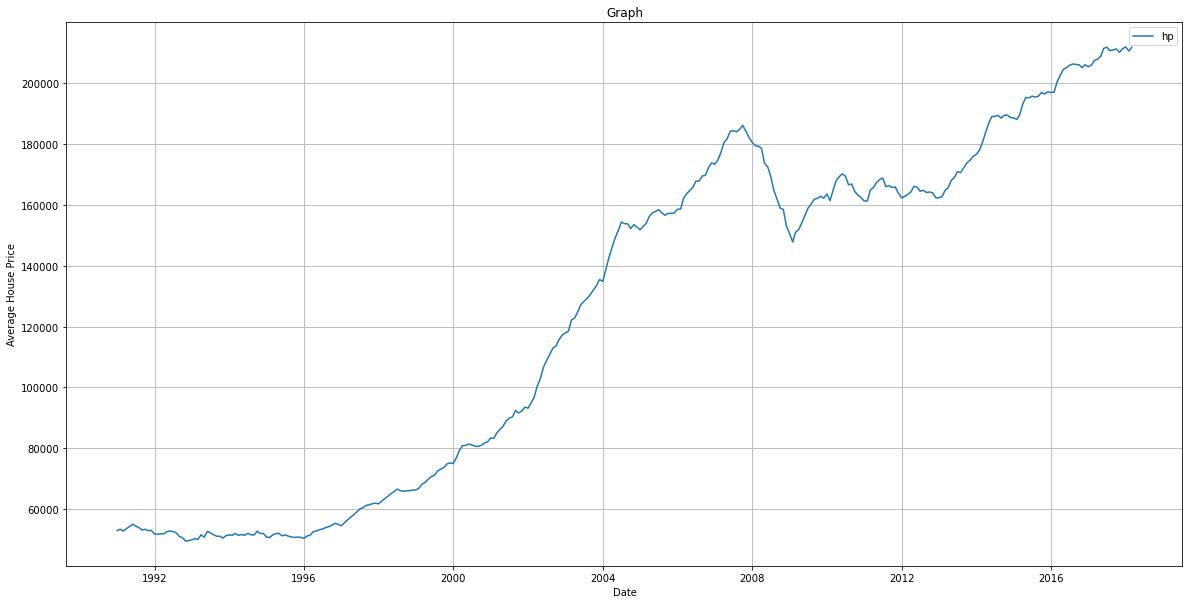

In [19]:
# Create line plot

plt.figure(1,figsize=(20,10))
plt.plot(data2['Average House Price'], label='hp')

plt.xlabel('Date')
plt.ylabel('Average House Price')
plt.title('Graph')
plt. grid(True)

plt.legend()
plt.show()

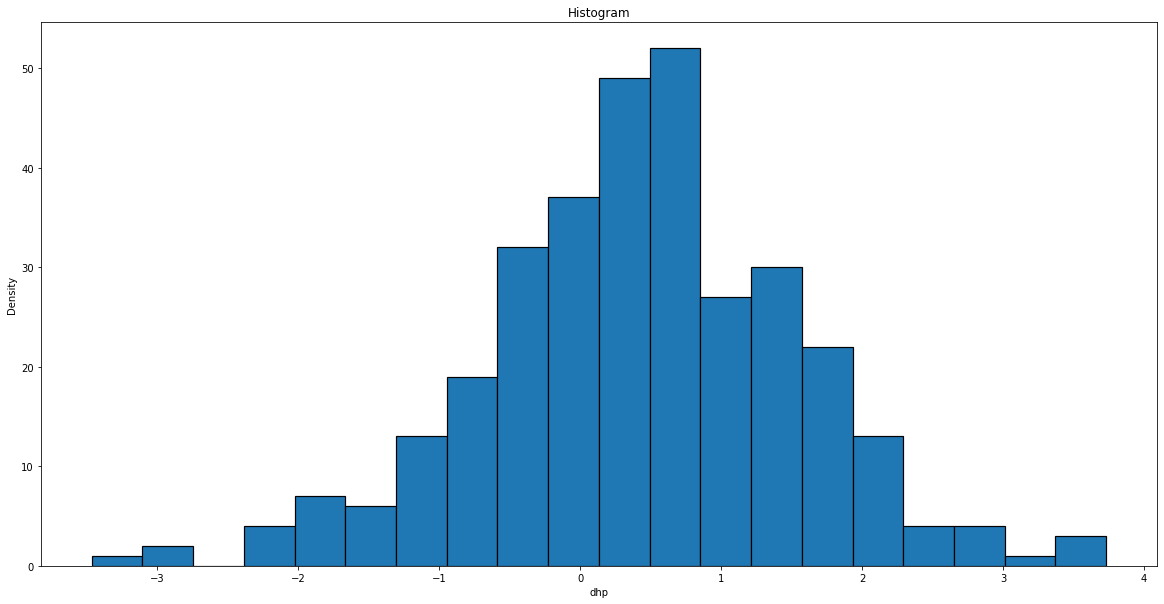

In [20]:
# Create histogram

plt.figure(2,figsize=(20,10))
plt.hist(data_dhp['dhp'], 20, edgecolor='black', linewidth=1.2)
plt.xlabel('dhp')
plt.ylabel('Density')
plt.title('Histogram')
plt.show()

### Saving data and results

#### Saving data to excel file

In [21]:
# Saving data to excel file

data2.to_excel('D:/OneDrive/Data/Brooks4e/Work/UKHP_workfile.xls')

C:\Users\andyw\AppData\Local\Temp/ipykernel_23248/3181175162.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data2.to_excel('D:/OneDrive/Data/Brooks4e/Work/UKHP_workfile.xls')


#### Saving data to Python workfile using library "pickle"

Data can be saved as Python workfile which can be reused later by loading that Python workfile. The library used here is "pickle" which has been imported at the beginning of this document.

In [22]:
# Saving data to a Python workfile
# The source is the datafrom "data2", which is the data of UKPH.xls imported above
# The target Python workfile is "UKHP.pickle", which will be saved at the sub-directory "Work"

with open('D:/OneDrive/Data/Brooks4e/Work/UKHP.pickle', 'wb') as handle:
    pickle.dump(data2, handle)

A physical file "UKHP.pickle" has been created and stored at the sub-directory "Work". This Python workfile will be used in later chapter.

To load a Python workfile, use the following commands.

In [23]:
# Load a Python workfile

with open('D:/OneDrive/Data/Brooks4e/Work/UKHP.pickle', 'rb') as handle:
    pickle_data = pickle.load(handle)

In [24]:
pickle_data.describe()

,Average House Price,dhp
count,327.000000,326.000000
mean,124660.484465,0.424402
std,56387.165665,1.114586
min,49601.664241,-3.464027
25%,61654.141609,-0.256025
50%,150946.108249,0.447332
75%,169239.278727,1.145618
max,211755.925562,3.731686


It is noted that the "pickle_data" is the same as "data2".